<a href="https://colab.research.google.com/github/HarshaAdithya317/Milage-prediction-ML-project-/blob/main/Fuel_economy_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

Import Data

In [69]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [29]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


remove missing values

In [70]:
df=df.dropna()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


data visualization

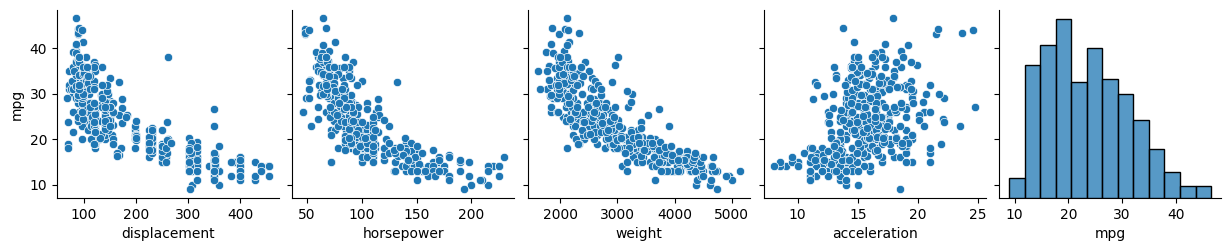

In [17]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

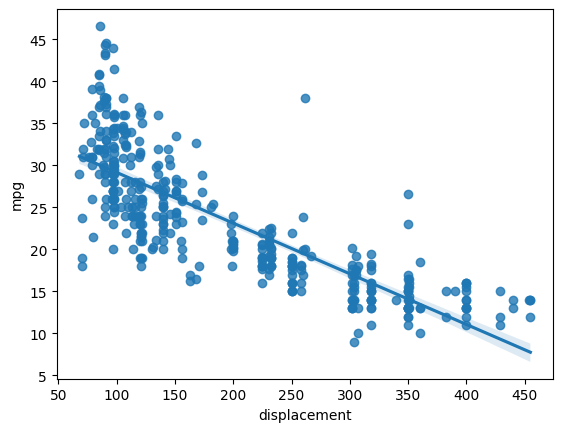

In [18]:
sns.regplot(x='displacement',y='mpg',data=df);

defining target variable features x and y

In [53]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [72]:
y=df['mpg']

In [73]:
y.shape

(392,)

In [74]:
x=df[['displacement','horsepower','weight','acceleration']]

In [76]:
x.shape

(392, 4)

In [33]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


Scalling Data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss=StandardScaler()

In [77]:
X=ss.fit_transform(x)

In [78]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [79]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


split data

In [44]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=2529)

In [81]:
x_train,x_test,y_train,y_test

(array([[ 0.53188952,  0.01380292,  0.44254114, -0.37792992],
        [ 0.53188952,  0.01380292,  0.56749422,  0.16646693],
        [ 1.02944745,  0.84622508,  1.25473614, -0.37792992],
        [-0.47279475, -0.74057967,  0.21503224,  1.47301937],
        [ 1.02944745,  0.66413273,  1.05198209, -0.19646431],
        [ 1.04858429,  1.18439658,  1.50817871, -0.01499869],
        [ 1.49830011,  0.87223827,  1.15218032, -0.84974052],
        [-0.36754212, -0.32436858, -0.46277926, -0.37792992],
        [ 0.6084369 , -0.24632901,  0.25393273,  0.81974315],
        [-0.46322633, -0.9746984 ,  0.32112448,  2.27146808],
        [-1.19042638, -0.11626304, -0.65728169, -1.10379239],
        [ 0.29267898, -0.24632901,  0.95178387,  1.25526063],
        [-1.10431059, -1.20881713, -1.35866925,  1.11008813],
        [ 1.96715277,  1.18439658,  1.75219085, -1.285258  ],
        [-0.36754212,  0.01380292, -0.27417084,  0.42051879],
        [-1.00862637, -1.15679075, -1.19010047,  1.18267438],
        

Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()

In [82]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
lr.intercept_

23.601118059983822

In [84]:
lr.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

predict test data

In [85]:
y_pred=lr.predict(x_test)

In [86]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

Model Accuracy

In [87]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [88]:
mean_absolute_error(y_test,y_pred)

3.3564087099398776

In [89]:
mean_absolute_percentage_error(y_test,y_pred)

0.14970671967399587

In [90]:
r2_score(y_test,y_pred)

0.6923289624942408

Polynomial Regression

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [97]:
x_train_2=poly.fit_transform(x_train)

In [102]:
x_test_2=poly.fit_transform(x_test)

In [98]:
lr.fit(x_train_2,y_train)

LinearRegression()

In [99]:
lr.intercept_

21.55533901604716

In [100]:
lr.coef_

array([-2.2748814 , -3.73899676, -2.6609481 ,  0.24305983,  2.0800206 ,
       -0.80160787, -3.04666232,  2.11059861,  1.49729576,  2.93749665])

In [108]:
y_pred_poly=lr.predict(x_test_2)

Model Accuracy

In [106]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [109]:
mean_absolute_error(y_test,y_pred_poly)

3.205494068743995

In [110]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.14706619052559178

In [111]:
r2_score(y_test,y_pred_poly)

0.6842004879324937